In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

<img src='img/kaggle-logo-transparent-300.png'/>

[kaggle.com](kaggle.com)

Пожалуй, самая известная платформа для конкурсов в машинном обучении и анализе данных.

* [Соревнования](https://www.kaggle.com/competitions)
** **
*От разминочных до ежегодного чемпионата с призом в $\$10^6$*
** **
* [Наборы данных](https://www.kaggle.com/datasets)
** **
Открытые данные - потренироваться, извлечь знания, исследовать, etc
** **
* ["Ядра"(Kernels)](https://www.kaggle.com/kernels)
** **
Концентрат опыта в коде
** **
* [Форум](https://www.kaggle.com/discussion)
** **
Концентрат опыта в человекочитаемом формате
** **
* [Вакансии](https://www.kaggle.com/jobs)
** **
1. Решить пару-тройку соревнований с хорошим результатом
2. Всё пишется в профиль
3. ???
4. Прибыль!
** **
* [Блог](http://blog.kaggle.com/)
** **
Интервью, заметки, истории успеха.
** **
* [Вики](https://www.kaggle.com/wiki/Home)
** **
Инструкция по применению.
** **

## Общая схема проведения соревнований по анализу данных

<img src='img/Kaggle contest 1.png'/>

Конкурс [Quora Question Pairs](https://www.kaggle.com/c/quora-question-pairs/data)

#### Описание(Description)

Где еще, кроме как на Quora, физик может помочь шеф-повару с математической задачкой и получить советы по приготовлению ужина? Quora - это место, где можно поделиться знаниями о чем угодно. Это платформа для вопросов и общения с людьми, которые привносят уникальные идеи и качественные ответы. Это возможность учиться друг у друга и лучше понимать мир.

Аудитория Quora составляет более 100 миллионов пользователей в месяц, поэтому неудивительно, что многие люди задают похожие вопросы. Большое количество похожих вопросов может запутать пользователя. Quora ценит "канонические" вопросы, потому что они ценны для активно ищущих пользователей и писателей и предлагают большую ценность обеим этим группам в долгосрочной перспективе.

В настоящее время Quora использует модель Random Forest для выявления повторяющихся вопросов. В этом соревновании  ставится задача решить эту проблему обработки естественного языка, применяя передовые методы для классификации того, являются ли пары вопросов дублирующимися или нет. Это упростит поиск высококачественных ответов на вопросы, которые приведут к улучшению платформы.

###### Формат файла с предсказаниями
Для каждого ID в наборе данных нужно предсказать вероятность того, что пары вопросов дублируют друг друга(число от 0 до 1). csv-файл(с запятыми) должен содержать заголовок и выглядеть примерно так:

```
test_id,is_duplicate
0,0.5
1,0.4
2,0.9
etc.

```

#### Оценка(Evaluation)  
Предсказания оцениваются с помощью log loss между предсказанными и реальными значениями.  
Что такое log loss?
$$\large l(y,p) = -ylog(p)-(1-y)log(1-p)$$
где y - реальное значение, p - предсказанное значение.

### Призы
1 место - $12500

2 место - $8500 

3 место - $4000  

### Таймлайн

30 мая 2017 года - завершается объединение команд, вступление в конкурс, etc
6 июня 2017 года - окончательное завершение приема новых предсказаний

## Данные

Цель соревнования - предсказать, какая из представленных пар вопросов содержит два вопроса с одинаковым значением. Обучающее множество - разметка пар вопросов экспертами-людьми. Разметка по сути своей субъективна, так как истинное значение предложений никогда не может быть достоверно известно. Маркировка людьми также является «шумным» процессом. Как следствие, разметку в этом наборе данных следует воспринимать как «информацию», не на 100% точную; может встречаться и неправильная маркировка. Мы полагаем, что отметки в целом правдивы, но это предположение может быть неверным в конкретном случае для отдельных элементов в наборе данных.

Обратите внимание: в качестве меры против мошенничества Kaggle дополнила тестовый набор компьютерными парами вопросов. Эти строки не приходят из Quora и не учитываются при подсчете очков. Все вопросы в учебном наборе являются подлинными примерами от Quora.
Поля данных:

    Id - идентификатор пары вопросов обучающего набора
    Qid1, qid2 - уникальные идентификаторы каждого вопроса (доступно только в train.csv)
    Question1, question2 - полный текст каждого вопроса
    Is_duplicate - целевая переменная, равная в 1, если question1 и question2 имеют одно и то же значение, и 0 в противном случае.

Размеры данных в строках:

In [4]:
!wc -l quora_data/train.csv

404302 quora_data/train.csv


In [10]:
!wc -l quora_data/test.csv

2345806 quora_data/test.csv


Начнем с подключения библиотек:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
data = pd.read_csv('quora_data/train.csv')

In [13]:
data.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


Взглянем на распределение признака is_duplicate, который обозначает, похожи ли вопросы.  
Сначала в виде чисел:

In [22]:
data.is_duplicate.value_counts(normalize=False)

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [23]:
data.is_duplicate.value_counts(normalize=True)

0    0.630802
1    0.369198
Name: is_duplicate, dtype: float64

А теперь в виде графика:

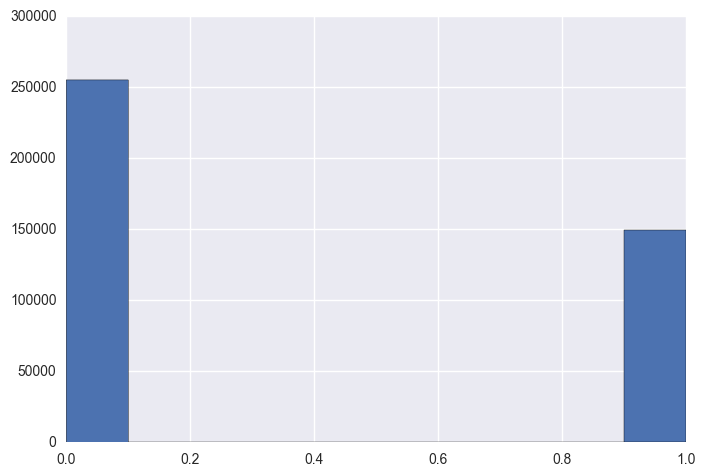

In [30]:
data.is_duplicate.hist()
plt.show()

Есть пара "тупых" вариантов решения:
1. Выбрать самое популярное значение(в основном вопросы не похожи между собой).
2. Выбрать некоторое среднее значение(все вопросы в среднем немного похожи).

Для начала подготовим тестовую выборку

In [31]:
test_data = pd.read_csv('quora_data/test.csv')

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345796 entries, 0 to 2345795
Data columns (total 3 columns):
test_id      int64
question1    object
question2    object
dtypes: int64(1), object(2)
memory usage: 53.7+ MB


In [34]:
test_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [43]:
ans_data = test_data.drop(['question1','question2'], axis=1)
ans_data['is_duplicate'] = 0

In [45]:
ans_data.to_csv('1.csv', index=None)

Оценка на публичной части - 6.01

In [46]:
ans_data.is_duplicate = data.is_duplicate.mean()

In [47]:
ans_data.to_csv('2.csv', index=None)

Оценка на публичной части - 0.55